## 3.Pandas

### 3.3 Pandas进阶

In [3]:
import pandas as pd
import numpy as np

#### 3.3.1 数据重塑和轴向旋转

##### （1）层次化索引

层次化索引是pandas的一项重要功能，他能使我们再一个轴上拥有多个索引

###### Series的层次化索引

In [3]:
s=pd.Series(np.arange(1,10),index=[['a','a','a','b','b','c','c','d','d'],[1,2,3,1,2,3,1,2,3]])
s

a  1    1
   2    2
   3    3
b  1    4
   2    5
c  3    6
   1    7
d  2    8
   3    9
dtype: int32

In [4]:
s.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2),
            ('c', 3),
            ('c', 1),
            ('d', 2),
            ('d', 3)],
           )

In [5]:
s['a':'b']

a  1    1
   2    2
   3    3
b  1    4
   2    5
dtype: int32

In [6]:
s[:,1]

a    1
b    4
c    7
dtype: int32

通过unstack方法可以将Series变成一个DataFrame

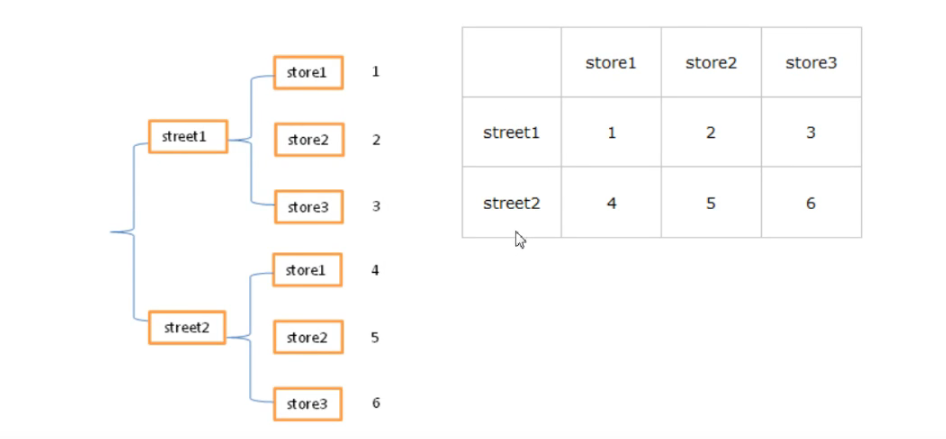

In [7]:
s.unstack()

,1,2,3
a,1.0,2.0,3.0
b,4.0,5.0,NaN
c,7.0,NaN,6.0
d,NaN,8.0,9.0


In [8]:
s.unstack().stack()

a  1    1.0
   2    2.0
   3    3.0
b  1    4.0
   2    5.0
c  1    7.0
   3    6.0
d  2    8.0
   3    9.0
dtype: float64

###### DataFrame的层次化索引

对于DataFrame来说，行和列都能够进行层次化索引。

In [9]:
data=pd.DataFrame(np.arange(12).reshape(4,3))
data

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


In [10]:
data=pd.DataFrame(np.arange(12).reshape(4,3),index=[['a','a','b','b'],[1,2,1,2]])
data

0   1   2
a 1  0   1   2
  2  3   4   5
b 1  6   7   8
  2  9  10  11

In [11]:
data=pd.DataFrame(np.arange(12).reshape(4,3),index=[['a','a','b','b'],[1,2,1,2]],columns=[['A','A','B'],['Z','X','C']])
data

A       B
     Z   X   C
a 1  0   1   2
  2  3   4   5
b 1  6   7   8
  2  9  10  11

选取列

In [12]:
data['A']

Z   X
a 1  0   1
  2  3   4
b 1  6   7
  2  9  10

设置名称

In [13]:
data.index.names=['row1','row2']
data

A       B
           Z   X   C
row1 row2           
a    1     0   1   2
     2     3   4   5
b    1     6   7   8
     2     9  10  11

In [9]:
data.columns.names=['col1','col2']
data

col1  A       B
col2  Z   X   C
a 1   0   1   2
  2   3   4   5
b 1   6   7   8
  2   9  10  11

行顺序调整

In [14]:
data.swaplevel('row1','row2')

A       B
           Z   X   C
row2 row1           
1    a     0   1   2
2    a     3   4   5
1    b     6   7   8
2    b     9  10  11

###### 层次化——电影数据示列

数据导入

In [4]:
df=pd.read_excel('movie_data2.xlsx')
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,名字,投票人数,类型,产地,上映时间,时长,年代,评分,首映地点
0,肖申克的救赎,692795,剧情/犯罪,美国,1994-09-10 00:00:00,142,1994,9.6,多伦多电影节
1,控方证人,42995,剧情/悬疑/犯罪,美国,1957-12-17 00:00:00,116,1957,9.5,美国
2,美丽人生,327855,剧情/喜剧/爱情,意大利,1997-12-20 00:00:00,116,1997,9.5,意大利
3,阿甘正传,580897,剧情/爱情,美国,1994-06-23 00:00:00,142,1994,9.4,洛杉矶首映
4,霸王别姬,478523,剧情/爱情/同性,中国大陆,1993-01-01 00:00:00,171,1993,9.4,香港


In [16]:
df.index

RangeIndex(start=0, stop=38729, step=1)

<font color=black size=4 face=雅黑>set_index：可以把列变成索引<br>
reset_index：把索引变成列</font>

把产地和年代同时设置成索引，产地是外层索引，年代是内层索引

In [17]:
df=df.set_index(['产地','年代'])
df.head()

名字    投票人数        类型                 上映时间   时长   评分    首映地点
产地   年代                                                                   
美国   1994  肖申克的救赎  692795     剧情/犯罪  1994-09-10 00:00:00  142  9.6  多伦多电影节
     1957    控方证人   42995  剧情/悬疑/犯罪  1957-12-17 00:00:00  116  9.5      美国
意大利  1997   美丽人生   327855  剧情/喜剧/爱情  1997-12-20 00:00:00  116  9.5     意大利
美国   1994    阿甘正传  580897     剧情/爱情  1994-06-23 00:00:00  142  9.4   洛杉矶首映
中国大陆 1993    霸王别姬  478523  剧情/爱情/同性  1993-01-01 00:00:00  171  9.4      香港

<font color=black size=4 face=雅黑>每一个索引都是一个元组</font>

In [18]:
df.index[1]

('美国', 1957)

获取所有的美国电影，由于产地信息已经变成了索引，因此可以用loc方法

In [19]:
df.loc['美国'].head()

,名字,投票人数,类型,上映时间,时长,评分,首映地点
年代,,,,,,,
1994,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节
1957,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国
1994,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映
2012,泰坦尼克号,157074,剧情/爱情/灾难,2012-04-10 00:00:00,194,9.4,中国大陆
1993,辛德勒的名单,306904,剧情/历史/战争,1993-11-30 00:00:00,195,9.4,华盛顿首映


这样做最大的好处就是我们可以简化很多的筛选环节

<font color=red size=4>索引交换 swaplevel </font>

In [20]:
df=df.swaplevel('产地','年代')
df.head()

,,名字,投票人数,类型,上映时间,时长,评分,首映地点
年代,产地,,,,,,,
1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节
1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国
1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利
1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映
1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港


In [21]:
df.loc[1994]

,名字,投票人数,类型,上映时间,时长,评分,首映地点
产地,,,,,,,
美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节
美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映
法国,这个杀手不太冷,662552,剧情/动作/犯罪,1994-09-14 00:00:00,133,9.4,法国
美国,34街的,768,剧情/家庭/奇幻,1994-12-23 00:00:00,114,7.9,美国
中国大陆,活着,202794,剧情/家庭,1994-05-18 00:00:00,132,9.0,法国
...,...,...,...,...,...,...,...
美国,鬼精灵2： 恐怖,60,喜剧/恐怖/奇幻,1994-04-08 00:00:00,85,5.8,美国
英国,黑色第16,44,剧情/惊悚,1996-02-01 00:00:00,106,6.8,美国
日本,蜡笔小新之布里布里王国的秘密宝藏 クレヨンしんちゃん ブリブリ王国の,2142,动画,1994-04-23 00:00:00,94,7.7,日本


取消层次化索引

In [22]:
df=df.reset_index()

In [23]:
df.head()

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点
0,1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节
1,1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国
2,1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利
3,1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港


##### （2）数据旋转

行列转化

In [24]:
data=df[:5]
data

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点
0,1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节
1,1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国
2,1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利
3,1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港


T 可以直接让数据的行和列进行交换

In [25]:
data.T

,0,1,2,3,4
年代,1994,1957,1997,1994,1993
产地,美国,美国,意大利,美国,中国大陆
名字,肖申克的救赎,控方证人,美丽人生,阿甘正传,霸王别姬
投票人数,692795,42995,327855,580897,478523
类型,剧情/犯罪,剧情/悬疑/犯罪,剧情/喜剧/爱情,剧情/爱情,剧情/爱情/同性
上映时间,1994-09-10 00:00:00,1957-12-17 00:00:00,1997-12-20 00:00:00,1994-06-23 00:00:00,1993-01-01 00:00:00
时长,142,116,116,142,171
评分,9.6,9.5,9.5,9.4,9.4
首映地点,多伦多电影节,美国,意大利,洛杉矶首映,香港


dataframe也可以使用stack和unstack，转化为层次索引的Series

In [26]:
data.stack()

0  年代                     1994
   产地                       美国
   名字                   肖申克的救赎
   投票人数                 692795
   类型                    剧情/犯罪
   上映时间    1994-09-10 00:00:00
   时长                      142
   评分                      9.6
   首映地点                 多伦多电影节
1  年代                     1957
   产地                       美国
   名字                     控方证人
   投票人数                  42995
   类型                 剧情/悬疑/犯罪
   上映时间    1957-12-17 00:00:00
   时长                      116
   评分                      9.5
   首映地点                     美国
2  年代                     1997
   产地                      意大利
   名字                    美丽人生 
   投票人数                 327855
   类型                 剧情/喜剧/爱情
   上映时间    1997-12-20 00:00:00
   时长                      116
   评分                      9.5
   首映地点                    意大利
3  年代                     1994
   产地                       美国
   名字                     阿甘正传
   投票人数                 580897
   类型                    剧情/爱情
   上映时间 

In [56]:
data.stack().unstack()

,年代,产地,Unnamed: 0,名字,投票人数,类型,上映时间,时长,评分,首映地点
0,1994,美国,0,肖申克的救赎,692795,剧情/犯罪,1994-09-10,142,9.6,多伦多电影节
1,1957,美国,1,控方证人,42995,剧情/悬疑/犯罪,1957-12-17,116,9.5,美国
2,1997,意大利,2,美丽人生,327855,剧情/喜剧/爱情,1997-12-20,116,9.5,意大利
3,1994,美国,3,阿甘正传,580897,剧情/爱情,1994-06-23,142,9.4,洛杉矶首映
4,1993,中国大陆,4,霸王别姬,478523,剧情/爱情/同性,1993-01-01,171,9.4,香港


#### 3.3.2 数据分组、分组运算

<font color=blue size=4 face=雅黑>GroupBy技术：实现数据的分组，和分组运算，作用类似于数据透视表</font>

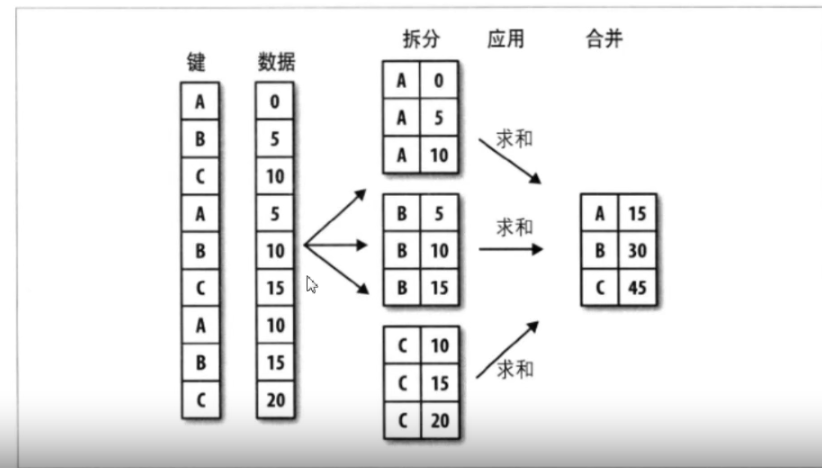

按照电影产地进行分组

先定义一个分组变量group

In [27]:
group=df.groupby(df['产地']) 

In [28]:
group

可以计算分组后的各个统计量

In [29]:
group.mean().head()

,年代,投票人数,时长,评分
产地,,,,
中国台湾,1999.009709,8474.864078,87.257282,7.066667
中国大陆,2004.599684,10898.293793,81.432930,6.064703
中国香港,1991.100316,8167.446159,88.541214,6.474114
丹麦,1999.090909,1993.858586,88.101010,7.245960
俄罗斯,1984.899371,1019.134172,95.918239,7.554507


计算每年的平均评分

In [5]:
df['评分'].groupby(df['年代']).mean().head()

年代
1888    7.950000
1890    4.800000
1892    7.500000
1894    6.633333
1895    7.575000
Name: 评分, dtype: float64

In [7]:
df.groupby(['年代'])['评分'].mean().head()

年代
1888    7.950000
1890    4.800000
1892    7.500000
1894    6.633333
1895    7.575000
Name: 评分, dtype: float64

In [31]:
df.groupby(df["年代"]).mean()

,投票人数,时长,评分
年代,,,
1888,388.000000,60.000000,7.950000
1890,51.000000,60.000000,4.800000
1892,176.000000,60.000000,7.500000
1894,112.666667,60.000000,6.633333
1895,959.875000,60.000000,7.575000
...,...,...,...
2012,7082.787463,85.099902,6.458374
2013,7603.723138,84.902049,6.392604
2014,7723.302597,85.997880,6.259777


只会对数值变量进行分组运算

In [32]:
df['年代']=df['年代'].astype('str')

In [33]:
df.groupby(df['产地']).mean().head()

,投票人数,时长,评分
产地,,,
中国台湾,8474.864078,87.257282,7.066667
中国大陆,10898.293793,81.432930,6.064703
中国香港,8167.446159,88.541214,6.474114
丹麦,1993.858586,88.101010,7.245960
俄罗斯,1019.134172,95.918239,7.554507


我们也可以传入多个分组变量

In [34]:
df.groupby([df['产地'],df['年代']]).mean().head()

投票人数     时长   评分
产地   年代                           
中国台湾 1963   121.000000  113.0  6.4
     1965   153.666667  105.0  6.8
     1966    51.000000   60.0  7.9
     1967  4444.000000  112.0  8.0
     1968    89.000000   83.0  7.4

获得每个地区，每一年的电影的评分的均值

In [35]:
df['评分'].groupby([df['产地'],df['年代']]).mean()

产地    年代  
中国台湾  1963    6.400000
      1965    6.800000
      1966    7.900000
      1967    8.000000
      1968    7.400000
                ...   
韩国    2012    6.064151
      2013    6.098198
      2014    5.650833
      2015    5.423853
      2016    5.730000
Name: 评分, Length: 1584, dtype: float64

<font color='red' size=3>Series通过unstack方法转化为dataframe——会产生缺失值</font>

In [36]:
df['评分'].groupby([df['产地'],df['年代']]).mean().unstack().T

产地,中国台湾,中国大陆,中国香港,丹麦,俄罗斯,其他,加拿大,印度,墨西哥,巴西,...,波兰,泰国,澳大利亚,瑞典,美国,英国,荷兰,西班牙,阿根廷,韩国
年代,,,,,,,,,,,,,,,,,,,,,
1888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.950000,NaN,NaN,NaN,NaN
1890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.800000,NaN,NaN,NaN,NaN,NaN
1892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.450000,NaN,NaN,NaN,NaN,NaN
1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,6.556098,5.727187,6.110526,7.418750,6.572727,6.591743,6.425000,6.502632,7.100000,7.32,...,7.066667,5.962963,6.614286,5.9625,6.437622,7.293103,6.766667,6.595238,6.483333,6.064151
2013,7.076471,5.316667,6.105714,6.555556,6.875000,6.853571,6.018182,6.400000,6.983333,8.00,...,6.966667,5.568000,6.760000,7.1000,6.339668,7.448322,6.563636,6.358333,6.616667,6.098198
2014,6.522222,4.963757,5.616667,7.120000,7.175000,6.596250,5.921739,6.374194,7.250000,6.86,...,7.060000,5.653571,6.568750,6.9600,6.415922,7.275000,7.300000,6.868750,7.150000,5.650833


#### 3.3.3 离散化处理

再实际的数据分析项目中，对有的数据属性，我们往往并不关注数据的绝对取值，只关注它所处的区间或等级。<br>
比如我们可以把评分9分及以上定义为A，7-9分为B，5-7分为C，3-5分为D，小于3分的为E。

<font color=blue size=3>离散化也可以称为分组、区间化

Pandas为我们提供了方便的函数cut()：<br>
pd.cut (x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False)<br>
参数：<br>
x：需要离散化的数组、Series、DataFrame对象<br>
bins：分组的依据<br>
right=True：默认包括右端点<br>
include_lowest=False：默认不包括左端点<br>
labels：是否要用标记替换分组<br>
retbins：返回x中对应的bins的列表<br>
precision：精度

In [41]:
df['评分等级']=pd.cut(df['评分'],[0,3,5,7,9,10],labels=['E','D','C','B','A'])
df

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级
0,1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A
1,1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A
2,1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A
3,1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A
...,...,...,...,...,...,...,...,...,...,...
38724,1983,法国,神学院 S,46,Adult,1905-06-05 00:00:00,58,8.6,美国,B
38725,1935,美国,1935年,57,喜剧/歌舞,1935-03-15 00:00:00,98,7.6,美国,B
38726,1986,中国大陆,血溅画屏,95,剧情/悬疑/犯罪/武侠/古装,1905-06-08 00:00:00,91,7.1,美国,B
38727,1986,中国大陆,魔窟中的幻想,51,惊悚/恐怖/儿童,1905-06-08 00:00:00,78,8.0,美国,B


In [48]:
?pd.cut

根据投票人数来刻画电影的热门<br>
投票人数越多，热门程度越高

<font color=red >使用  np.percentile 进行分位数计算</font>

In [43]:
bins=np.percentile(df['投票人数'],[0,20,40,60,80,100])

In [44]:
df['热门程度']=pd.cut(df['投票人数'],bins,labels=['E','D','C','B','A'])

In [45]:
df[:5]

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
0,1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A
1,1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A
2,1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A,A
3,1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A


大烂片：投票人数多，评分低

In [89]:
df[(df.热门程度=='A')&(df.评分等级=='E')]

,年代,产地,Unnamed: 0,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
655,2011,中国大陆,655,B区,5187,剧情/惊悚/恐怖,2011-06-03 00:00:00,89,2.3,中国大陆,E,A
4376,2014,中国大陆,4376,怖偶,4867,悬疑/惊悚,2014-05-07 00:00:00,88,2.8,中国大陆,E,A
5413,2011,中国大陆,5413,床下有人,4309,悬疑/惊悚,2011-10-14 00:00:00,100,2.8,中国大陆,E,A
6802,2013,中国大陆,6802,帝国秘符,4351,动作/冒险,2013-09-18 00:00:00,93,3.0,中国大陆,E,A
8232,2011,中国大陆,8232,飞天,4764,剧情,2011-07-01 00:00:00,115,2.9,中国大陆,E,A
8406,2014,中国大陆,8406,分手达人,3937,喜剧/爱情,2014-06-06 00:00:00,90,2.7,中国大陆,E,A
9601,2012,中国大陆,9601,孤岛惊魂,2982,悬疑/惊悚/恐怖,2013-01-26 00:00:00,93,2.8,中国大陆,E,A
10513,2013,中国大陆,10513,海天盛宴·韦口,3788,情色,2013-10-12 00:00:00,88,2.9,网络,E,A
16799,2013,中国大陆,16799,孪生密码,6390,动作/悬疑,2013-11-08 00:00:00,96,2.9,中国大陆,E,A
21533,2010,日本,21536,拳皇,6329,动作/科幻/冒险,2012-10-12 00:00:00,93,3.0,中国大陆,E,A


冷门高分电影

In [44]:
df[(df.热门程度=='E')&(df.评分等级=='A')]

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
456,2015,美国,NaN,45,音乐,2015-12-14 00:00:00,60,9.3,美国,A,E
587,2011,英国,BBC喜剧音,38,喜剧/音乐/歌舞,2011-08-13 00:00:00,95,9.3,美国,A,E
642,2003,美国,NaN,38,纪录片/音乐,2003-02-03 00:00:00,55,9.2,美国,A,E
686,2014,英国,NaN,63,音乐/舞台艺术,2014-05-18 00:00:00,49,9.5,美国,A,E
698,2008,英国,NaN,52,纪录片,2008-07-25 00:00:00,40,9.8,美国,A,E
...,...,...,...,...,...,...,...,...,...,...,...
37579,1986,英国,歌唱神探,36,剧情/悬疑/歌舞,1986-11-16 00:00:00,415,9.1,美国,A,E
37705,1972,美国,NaN,56,纪录片,1972-12-23 00:00:00,70,9.3,美国,A,E
38111,1975,美国,山那边,70,剧情,1975-11-14 00:00:00,103,9.1,美国,A,E
38444,2015,美国,奎,62,纪录片/短片,2015-08-19 00:00:00,9,9.1,纽约电影论坛,A,E


将处理的数据保存

In [45]:
df.to_excel('movies_data3.xlsx')

#### 3.3.4 合并数据集

##### （1）append

先把数据集拆分为多个，再进行合并

In [47]:
df_usa=df[df.产地=='美国']
df_cn=df[df.产地=='中国大陆']
df_cn

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A
21,1961,中国大陆,大闹天宫,74881,动画/奇幻,1905-05-14 00:00:00,114,9.2,上集,A,A
29,2015,中国大陆,穹顶之下,51113,纪录片,2015-02-28 00:00:00,104,9.2,中国大陆,A,A
38,1982,中国大陆,茶馆,10678,剧情/历史,1905-06-04 00:00:00,118,9.2,美国,A,A
45,1988,中国大陆,山水情,10781,动画/短片,1905-06-10 00:00:00,19,9.2,美国,A,A
...,...,...,...,...,...,...,...,...,...,...,...
38719,1986,中国大陆,T省的八四、八五,380,剧情,1905-06-08 00:00:00,94,8.7,美国,B,C
38721,1986,中国大陆,失踪的女中学生,101,儿童,1905-06-08 00:00:00,102,7.4,美国,B,D
38722,1986,中国大陆,血战台儿庄,2908,战争,1905-06-08 00:00:00,120,8.1,美国,B,A
38726,1986,中国大陆,血溅画屏,95,剧情/悬疑/犯罪/武侠/古装,1905-06-08 00:00:00,91,7.1,美国,B,D


In [98]:
df_cn.append(df_usa)

,年代,产地,Unnamed: 0,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
4,1993,中国大陆,4,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.400000,香港,A,A
21,1961,中国大陆,21,大闹天宫,74881,动画/奇幻,1905-05-14 00:00:00,114,9.200000,上集,A,A
29,2015,中国大陆,29,穹顶之下,51113,纪录片,2015-02-28 00:00:00,104,9.200000,中国大陆,A,A
38,1982,中国大陆,38,茶馆,10678,剧情/历史,1905-06-04 00:00:00,118,9.200000,美国,A,A
45,1988,中国大陆,45,山水情,10781,动画/短片,1905-06-10 00:00:00,19,9.200000,美国,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...
38718,1987,美国,38721,零下的激情,199,剧情/爱情/犯罪,1987-11-06 00:00:00,98,7.400000,美国,B,D
38720,1986,美国,38723,离别秋波,240,剧情/爱情/音乐,1986-02-19 00:00:00,90,8.200000,美国,B,C
38723,1986,美国,38726,极乐森林,45,纪录片,1986-09-14 00:00:00,90,8.100000,美国,B,E
38725,1935,美国,38728,1935年,57,喜剧/歌舞,1935-03-15 00:00:00,98,7.600000,美国,B,E


##### （2）merge

pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
       left_index=False, right_index=False, sort=False,
       suffixes=('_x','_y'), copy=True, indicator=False)

left：对象<br>
right：另一个对象<br>
on：要加入的列。必须在左、右综合对象中找到。如果不能通过，left_index和right_index是假，将推断DataFrame中的列的交叉点为连接键<br>
left_on：从左边的综合使用作为键列。可以是列名或数组的长度等于长度综合。<br>
right_on：从右边的综合使用作为键列。可以是列名或数组的长度等于长度综合。<br>
left_index：如果为True，则使用索引（行标签）从左综合作为其连接键。在与多重（层次）的综合，级别数必须匹配连接键从右综合的数目。<br>
right_index：先沟通用法作为正确综合left_index。<br>
how：之一‘左’，‘右’，‘外在’，‘内部’。默认为内联。<br>
sort：综合通过连接键按字典顺序对结果进行排序。默认为False，设置为False在大多数情况下将提高性能。<br>
suffixes：字符串后缀并不适用于重叠列的元组。默认为（'_x'，'_y'）<br>
copy：即使重新索引是不必要总是从传递的综合对象，赋值的数据（默认为True）。在许多情况下不能避免，但可能会提高性能/内存使用情况，可以避免赋值上述案件有些病理，但尽管如此提供此选项。<br>
indicator：将列添加到输出综合呼吁_merge与信息源的每一行。_merge是绝对类型，并对观测其合并键只出现在‘左’的综合，关策其合并键只会出现在‘正确’的综合，和两个如果观测合并关键发现在两个 right_only  left_only 的值。

选取6部热门电影进行操作

In [47]:
?pd.merge

In [48]:
df1=df.loc[:5]
df1

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
0,1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A
1,1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A
2,1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A,A
3,1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A
5,2012,美国,泰坦尼克号,157074,剧情/爱情/灾难,2012-04-10 00:00:00,194,9.4,中国大陆,A,A


In [49]:
df2=df.loc[:5][['名字','产地']]
df2['票房']=[111,222,333,444,555,666]
df2

,名字,产地,票房
0,肖申克的救赎,美国,111
1,控方证人,美国,222
2,美丽人生,意大利,333
3,阿甘正传,美国,444
4,霸王别姬,中国大陆,555
5,泰坦尼克号,美国,666


In [50]:
##打乱样本
df2=df2.sample(frac=1)
df2

,名字,产地,票房
4,霸王别姬,中国大陆,555
1,控方证人,美国,222
3,阿甘正传,美国,444
0,肖申克的救赎,美国,111
5,泰坦尼克号,美国,666
2,美丽人生,意大利,333


In [51]:
## 重新设置索引
df2.index=range(len(df2))
df2

,名字,产地,票房
0,霸王别姬,中国大陆,555
1,控方证人,美国,222
2,阿甘正传,美国,444
3,肖申克的救赎,美国,111
4,泰坦尼克号,美国,666
5,美丽人生,意大利,333


对df1和df2进行合并

In [52]:
 pd.merge(df1,df2,how='inner',on='名字')

,年代,产地_x,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度,产地_y,票房
0,1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A,美国,111
1,1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A,美国,222
2,1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A,A,意大利,333
3,1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A,美国,444
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A,中国大陆,555
5,2012,美国,泰坦尼克号,157074,剧情/爱情/灾难,2012-04-10 00:00:00,194,9.4,中国大陆,A,A,美国,666


两个样本都有 产地 列，所以会有两个产地列

##### （3）concat

将多个数据集进行批量合并

In [53]:
df1=df[:5]
df2=df[100:105]
df3=df[200:205]

In [56]:
df1

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
0,1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A
1,1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A
2,1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A,A
3,1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A


In [57]:
df2

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
100,1993,韩国,101,146,喜剧/爱情,1993-06-19 00:00:00,112,7.4,韩国,B,D
101,1995,英国,10,186,喜剧,1995-01-25 00:00:00,101,7.4,美国,B,D
102,2013,韩国,素媛,114819,剧情/家庭,2013-10-02 00:00:00,123,9.1,韩国,A,A
103,2003,美国,101忠狗续集：伦敦,924,喜剧/动画/家庭,2003-01-21 00:00:00,70,7.5,美国,B,B
104,2000,美国,10,9514,喜剧/家庭,2000-09-22 00:00:00,100,7.0,美国,C,A


In [58]:
df3

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
200,2014,日本,最完美的离婚 2014特别篇,18478,剧情/喜剧/爱情,2014-02-08 00:00:00,120,9.1,日本,A,A
201,2009,日本,2001夜物,84,剧情/动画,2009-10-02 00:00:00,80,6.6,美国,C,D
202,2009,中国香港,头七 頭,7039,恐怖,2009-05-21 00:00:00,60,6.2,美国,C,A
203,1896,法国,火车进站 L,7001,纪录片/短片,1896-01-06,60,8.8,法国,B,A
204,2009,美国,银行舞蹈,6944,短片,1905-07-01 00:00:00,60,7.8,美国,B,A


In [59]:
dff=pd.concat([df1,df2,df3],axis=0) ##默认axis=0 增加行数，axis=1增加列数
dff

,年代,产地,名字,投票人数,类型,上映时间,时长,评分,首映地点,评分等级,热门程度
0,1994,美国,肖申克的救赎,692795,剧情/犯罪,1994-09-10 00:00:00,142,9.6,多伦多电影节,A,A
1,1957,美国,控方证人,42995,剧情/悬疑/犯罪,1957-12-17 00:00:00,116,9.5,美国,A,A
2,1997,意大利,美丽人生,327855,剧情/喜剧/爱情,1997-12-20 00:00:00,116,9.5,意大利,A,A
3,1994,美国,阿甘正传,580897,剧情/爱情,1994-06-23 00:00:00,142,9.4,洛杉矶首映,A,A
4,1993,中国大陆,霸王别姬,478523,剧情/爱情/同性,1993-01-01 00:00:00,171,9.4,香港,A,A
100,1993,韩国,101,146,喜剧/爱情,1993-06-19 00:00:00,112,7.4,韩国,B,D
101,1995,英国,10,186,喜剧,1995-01-25 00:00:00,101,7.4,美国,B,D
102,2013,韩国,素媛,114819,剧情/家庭,2013-10-02 00:00:00,123,9.1,韩国,A,A
103,2003,美国,101忠狗续集：伦敦,924,喜剧/动画/家庭,2003-01-21 00:00:00,70,7.5,美国,B,B
104,2000,美国,10,9514,喜剧/家庭,2000-09-22 00:00:00,100,7.0,美国,C,A
